<a href="https://colab.research.google.com/github/SiriusBits/ml-engineering-lab/blob/main/notebooks/stats/OLS_and_MLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize

# Prerequisite: A _computational_ framework for "optimization"

For some function $f(x)$, we want to find the value $x$ that minimizes/maximizes $f(x)$.

In [ ]:
def f(x):
  """Simple example where the "answer" is x = 0"""
  return x**2

In [ ]:
solution = minimize(f, x0=100)

In [ ]:
solution.x

array([-7.45122473e-09])

## Notes

* Notice the precision limitations of numerical optimization
* But also the convenience! Can also use for multivariate functions

In [ ]:
def f2(params):
  """Example where answer is x = 5 and y = 8

  params must have two elements, representing x and y
  """
  x, y = params
  return (x-5)**2 + (y-8)**2

In [ ]:
minimize(f2, x0=(0, 0))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.348369442388405e-12
        x: [ 5.000e+00  8.000e+00]
      nit: 4
      jac: [ 2.597e-06 -1.636e-06]
 hess_inv: [[ 8.596e-01 -2.247e-01]
            [-2.247e-01  6.404e-01]]
     nfev: 15
     njev: 5

# Numerical solution to OLS!

**THESE APPROACH ARE FOR ILLUSTRATION ONLY! THERE ARE MUCH BETTER/EFFICIENT WAYS FOR ACTUALLY FITING AN OLS MODEL IN PRACTICE USING LIBRARIES (`statsmodels`, `sklearn`)! SEE LAST SECTION OF NOTEBOOK FOR THOSE EXAMPLES**

First, let's grab the data:

In [ ]:
import seaborn as sns

df = sns.load_dataset("car_crashes")[["speeding", "alcohol"]]
df.head()

,speeding,alcohol
0,7.332,5.640
1,7.421,4.525
2,6.510,5.208
3,4.032,5.824
4,4.200,3.360


Let’s visualize using Seaborn’s regplot:

<Axes: xlabel='alcohol', ylabel='speeding'>

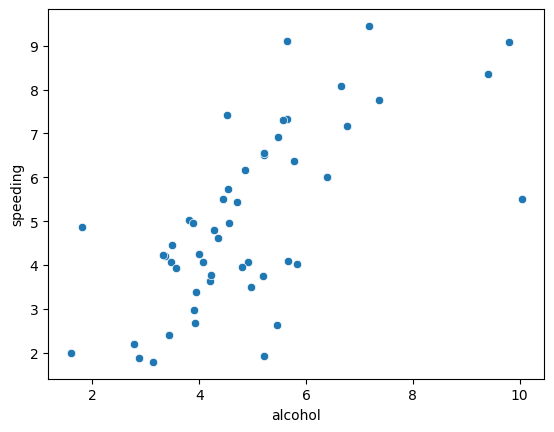

In [ ]:
sns.scatterplot(x='alcohol', y='speeding', data = df)

## 1. _Literally_ minimizing the squared error (i.e., _least_ squares)

In [ ]:
def squared_error(params):
  """Squared error of speeding ~ b0 + b1 * alcohol"""
  b0, b1 = params
  y = b0 + b1 * df.alcohol
  return ((df.speeding - y)**2).mean()

In [ ]:
b0, b1 = minimize(squared_error, [0, 0]).x

print(f"Speeding ~ {b0:.2f} + {b1:.2f} * alcohol")

Speeding ~ 1.18 + 0.78 * alcohol


## 2. Numerically finding the MLE under normality assumptions

In [ ]:
from scipy import stats

def neglikelihood(params):
  """Negative (log)likelihood for e ~ Norm(0, 1) where

  e = speeding - (b0 + b1 * alcohol)

  """
  b0, b1 = params
  y = b0 + b1 * df.alcohol

  # Calculate the log-likelihood for normal distribution
  l = np.sum(stats.norm.logpdf(df.speeding - y, 0, 1))

  # Return _negative_ log-likelihood for minimization
  return -l

In [ ]:
b0, b1 = minimize(neglikelihood, [1, 1]).x

print(f"Speeding ~ {b0:.2f} + {b1:.2f} * alcohol")

Speeding ~ 1.18 + 0.78 * alcohol


Minimize the negative log-likelihood of the generated data using the minimize method available with SciPy’s optimize module.

# Practical appraoch to fitting OLS/LinearRegression models

## `statsmodels`: Better summary of model properties; more _stats_ oriented (as the name suggests)

In [ ]:
from statsmodels import api

y = df.speeding
x = df.alcohol

features = api.add_constant(x)
model = api.OLS(y, features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               speeding   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     39.85
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           7.70e-08
Time:                        20:39:32   Log-Likelihood:                -92.486
No. Observations:                  51   AIC:                             189.0
Df Residuals:                      49   BIC:                             192.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1792      0.641      1.840      0.072      -0.109       2.467
alcohol        0.7815      0.124      6.313      0.000       0.533       1.030
==============================================================================
Omnibus:                        0.213   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.117
Skew:                          -0.111   Prob(JB):                        0.943
Kurtosis:                       2.924   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(f"Speeding ~ {model.params.const:.2f} + {model.params.alcohol:.2f} * alcohol")

Speeding ~ 1.18 + 0.78 * alcohol


## `sklearn`: More geared towards blackbox ML-style "fit/predict". No "inference".

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X=df[["alcohol"]], y=y)

LinearRegression()

In [ ]:
print(f"Speeding ~ {lr.intercept_:.2f} + {lr.coef_[0]:.2f} * alcohol")

Speeding ~ 1.18 + 0.78 * alcohol
